# Load libraries


In [1]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
# Set the root directory to be able to access other folders in the project

CURR_DIR = os.getcwd()  # current working directory
BASE_DIR = Path(CURR_DIR).parent  # parent directory
print(BASE_DIR)

/home/adrien/Documents/Github/MFA/week_02


# Import data


The `MFA_II_tutorial_II.xlsx` contains stock data about the ceramic plates from a mysterious collectioner.

![ceramic_plates](../img/ceramic_plates.png)


In [3]:
# Load the ceramic plates stock and check your data
file_path = BASE_DIR / "data_input" / "MFA_II_tutorial_II.xlsx"
data = pd.read_excel(file_path, sheet_name="stock_driven")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     61 non-null     int64  
 1   stock    61 non-null     int64  
 2   inflow   0 non-null      float64
 3   outflow  0 non-null      float64
dtypes: float64(2), int64(2)
memory usage: 2.0 KB


In [4]:
# set the index to year
data = data.set_index(["year"])

years = data.index
end_year = years[-1]
print(f"end_year = {end_year}")

data

end_year = 2050


,stock,inflow,outflow
year,,,
1990,1,NaN,NaN
1991,2,NaN,NaN
1992,11,NaN,NaN
1993,20,NaN,NaN
1994,26,NaN,NaN
...,...,...,...
2046,705,NaN,NaN
2047,718,NaN,NaN
2048,731,NaN,NaN


In [5]:
time_max = data.shape[0]
timesteps = np.arange(0, time_max)

# Survival curve


For now, just use the code below. We will dive into survival curves later on in the `week_2_survival_curves.ipynb` notebook.


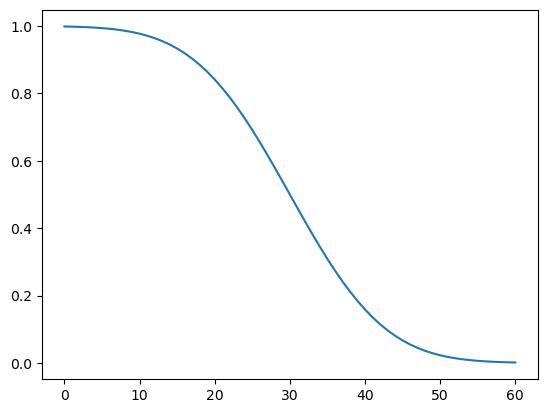

In [6]:
# Normal distribution
curve_surv = norm.sf(timesteps, loc=30, scale=10)

plt.plot(curve_surv)
plt.show()

# Survival curve matrix


![shifted_survival_curve](../img/shifted_survival_curve.png)


In [7]:
# create survival curve matrix filled with zeros
curve_surv_matrix = pd.DataFrame(0, index=timesteps, columns=timesteps, dtype=float)

# and populate that matrix
for time in timesteps:
    # at each iteration, we shift the survival curve
    shifted_curve_surv = curve_surv[0 : time_max - time]
    # and we fill the survival curve matrix with the shifted survival curve
    curve_surv_matrix.loc[time:time_max, time] = shifted_curve_surv

curve_surv_matrix

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.998650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,0.998134,0.998650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,0.997445,0.998134,0.998650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,0.996533,0.997445,0.998134,0.998650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4,0.995339,0.996533,0.997445,0.998134,0.998650,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.004661,0.006210,0.008198,0.010724,0.013903,0.017864,0.022750,0.028717,0.035930,0.044565,...,0.993790,0.995339,0.996533,0.997445,0.998134,0.998650,0.000000,0.000000,0.000000,0.00000
57,0.003467,0.004661,0.006210,0.008198,0.010724,0.013903,0.017864,0.022750,0.028717,0.035930,...,0.991802,0.993790,0.995339,0.996533,0.997445,0.998134,0.998650,0.000000,0.000000,0.00000
58,0.002555,0.003467,0.004661,0.006210,0.008198,0.010724,0.013903,0.017864,0.022750,0.028717,...,0.989276,0.991802,0.993790,0.995339,0.996533,0.997445,0.998134,0.998650,0.000000,0.00000
59,0.001866,0.002555,0.003467,0.004661,0.006210,0.008198,0.010724,0.013903,0.017864,0.022750,...,0.986097,0.989276,0.991802,0.993790,0.995339,0.996533,0.997445,0.998134,0.998650,0.00000


# Stock driven model


In [8]:
# This is our model input (together with the curve_surv_matrix)
stock = data["stock"]
stock

year
1990      1
1991      2
1992     11
1993     20
1994     26
       ... 
2046    705
2047    718
2048    731
2049    744
2050    757
Name: stock, Length: 61, dtype: int64

The stock-driven equation is:

$$
\textcolor{#20B2AA}{\text{inflow}(y)} = \frac{\textcolor{#DAA520}{\text{stock}(y)} - \sum_{t=y_0}^{y-1} [\textcolor{#20B2AA}{\text{inflow}(t)} \times \textcolor{#9370DB}{\text{surv}(y-t)]}}{\textcolor{#9370DB}{\text{surv}(0)}}
$$


If we remember that:

- $\textcolor{#9370DB}{\text{surv}(0)}$ is also the value on the diagonal of the `curve_surv_matrix`,

and using pandas notation we get:

$$
\textcolor{#20B2AA}{\text{inflow.iloc[time]}} = \frac{\textcolor{#DAA520}{\text{stock.iloc[time]}} - \sum_{\text{t}=0}^{\text{time}-1}  \textcolor{#38761d}{\text{cohort}\textunderscore\text{matrix.loc[time, t]}}}{\textcolor{#9370DB}{\text{survival}\textunderscore\text{curve}\textunderscore\text{matrix.iloc[time, time]}}}
$$


$$
\textcolor{#20B2AA}{\text{inflow.iloc[time]}} = \frac{\textcolor{#DAA520}{\text{stock.iloc[time]}} - \textcolor{#38761d}{\text{cohort}\textunderscore\text{matrix.loc[time, :time-1]}}\text{.sum()} }{\textcolor{#9370DB}{\text{survival}\textunderscore\text{curve}\textunderscore\text{matrix.iloc[time, time]}}}
$$


## Inflows and cohort matrix


In [9]:
# create inflow series and survival matrix filled with zeros
inflows = pd.Series(0, index=years, dtype=float)
cohort_surv_matrix = pd.DataFrame(0, index=timesteps, columns=timesteps, dtype=float)

# and populating them
for time in timesteps:
    # we calculate the inflow of the time-th year
    inflows.iloc[time] = (
        stock.iloc[time] - cohort_surv_matrix.loc[time, : time - 1].sum()
    ) / curve_surv_matrix.loc[time, time]
    # and we scale the shifted survival curve with the inflow
    cohort_surv_matrix.loc[:, time] = curve_surv_matrix.loc[:, time] * inflows.iloc[time]

cohort_surv_matrix

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
1,0.999483,1.000517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
2,0.998793,1.000000,9.001207,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
3,0.997880,0.999309,8.996557,9.006254,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
4,0.996684,0.998396,8.990344,9.001601,6.012975,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.004667,0.006221,0.073887,0.096715,0.083714,0.089806,0.023448,0.029869,1.728808,0.584135,...,28.035639,28.432007,28.820027,29.203774,29.586736,29.971790,0.000000,0.000000,0.000000,0.0000
57,0.003472,0.004670,0.055970,0.073929,0.064571,0.069894,0.018412,0.023663,1.381714,0.470951,...,27.979559,28.387775,28.785490,29.177076,29.566303,29.956306,30.349582,0.000000,0.000000,0.0000
58,0.002559,0.003473,0.042013,0.056001,0.049358,0.053911,0.014330,0.018581,1.094636,0.376398,...,27.908282,28.330991,28.740708,29.142111,29.539274,29.935618,30.333903,30.736243,0.000000,0.0000
59,0.001868,0.002560,0.031249,0.042037,0.037389,0.041210,0.011053,0.014462,0.859557,0.298194,...,27.818591,28.258819,28.683218,29.096774,29.503875,29.908251,30.312955,30.720364,31.132220,0.0000


In [10]:
time = 1  # increase the time step to see how we populate inflows and cohort_surv_matrix

print(f"Stock = {stock.iloc[time]}\n")

print("cohort_surv_matrix (sliced):")
display(cohort_surv_matrix.loc[time, : time - 1])

print(
    f"\nEquation:\n"
    f"({stock.iloc[time]} - {cohort_surv_matrix.loc[time, : time - 1].sum()}) / {curve_surv_matrix.loc[time, time]}"
    f" = {inflows.iloc[time]}    (inflow at time step {time})\n"
)
print("curve_surv_matrix:")
display(curve_surv_matrix.loc[:, :time].head(10))
print("cohort_surv_matrix:")
display(cohort_surv_matrix.loc[:, :time].head(10))

Stock = 2

cohort_surv_matrix (sliced):


0    0.999483
Name: 1, dtype: float64


Equation:
(2 - 0.9994833873568559) / 0.9986501019683699 = 1.0018690336796592    (inflow at time step 1)

curve_surv_matrix:


,0,1
0,0.998650,0.000000
1,0.998134,0.998650
2,0.997445,0.998134
3,0.996533,0.997445
4,0.995339,0.996533
5,0.993790,0.995339
6,0.991802,0.993790
7,0.989276,0.991802
8,0.986097,0.989276
9,0.982136,0.986097


cohort_surv_matrix:


,0,1
0,1.000000,0.000000
1,0.999483,1.000517
2,0.998793,1.000000
3,0.997880,0.999309
4,0.996684,0.998396
5,0.995134,0.997199
6,0.993143,0.995648
7,0.990613,0.993656
8,0.987429,0.991125
9,0.983463,0.987940


<Axes: xlabel='year', ylabel='year'>

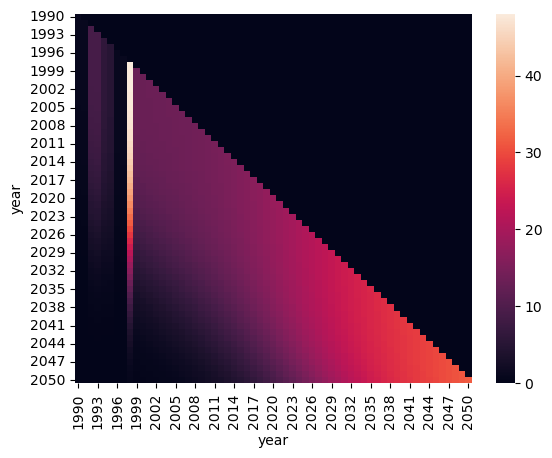

In [10]:
# set index and columns to years instead of timesteps
cohort_surv_matrix.index = years
cohort_surv_matrix.columns = years

# and visualize the cohort_surv_matrix matrix with a heatmap
sns.heatmap(cohort_surv_matrix, annot=False)

## Net addition to stock


$$\text{NAS}(y) = \text{stock}(y) - \text{stock}(y-1)$$


In [11]:
# calculate the net addition to stock
nas = np.diff(stock, prepend=0)  # prepending 0 assumes no initial stock
nas

array([ 1,  1,  9,  9,  6,  5,  1,  1, 48, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13])

## Outflows


$$\text{outflow}(y) = \text{inflow}(y) - \text{NAS}(y)$$


In [12]:
# calculate outflows and nas:
outflows = inflows - nas
outflows

year
1990     0.001352
1991     0.001869
1992     0.013374
1993     0.018428
1994     0.021103
          ...    
2046    17.012303
2047    17.390607
2048    17.777790
2049    18.174302
2050    18.580230
Length: 61, dtype: float64

## Putting it together


In [ ]:
# Load input data
file_path = BASE_DIR / "data_input" / "MFA_II_tutorial_II.xlsx"
data = pd.read_excel(file_path, sheet_name="stock_driven")

# set the index to year
data = data.set_index(["year"])

# define useful variables
years = data.index
end_year = years[-1]
time_max = data.shape[0]
timesteps = np.arange(0, time_max)

# Create the survival curve
curve_surv = norm.sf(timesteps, loc=30, scale=10)

# create the survival curve matrix
curve_surv_matrix = pd.DataFrame(0, index=timesteps, columns=timesteps, dtype=float)
for time in timesteps:
    # Fill the survival curve matrix with the shifted survival curve
    curve_surv_matrix.loc[time:time_max, time] = curve_surv[0 : time_max - time]

# Define the input for the stock-driven model
stock = data["stock"]

# create inflow series and survival matrix filled with zeros and populate them
inflows = pd.Series(0, index=years, dtype=float)
cohort_surv_matrix = pd.DataFrame(0, index=timesteps, columns=timesteps, dtype=float)
for time in timesteps:
    # we calculate the inflow of the time-th year
    inflows.iloc[time] = (
        stock.iloc[time] - cohort_surv_matrix.loc[time, : time - 1].sum()
    ) / curve_surv_matrix.loc[time, time]
    # and we scale the shifted survival curve with the inflow
    cohort_surv_matrix.loc[:, time] = curve_surv_matrix.loc[:, time] * inflows.iloc[time]

# set index and columns to years instead of timesteps
cohort_surv_matrix.index = years
cohort_surv_matrix.columns = years

# Compute nas, and outflows
data["inflow"] = inflows
data["nas"] = np.diff(data["stock"], prepend=0)
data["outflow"] = data["inflow"] - data["nas"]

data

,stock,inflow,outflow,nas
year,,,,
1990,1,1.001352,0.001352,1
1991,2,1.001869,0.001869,1
1992,11,9.013374,0.013374,9
1993,20,9.018428,0.018428,9
1994,26,6.021103,0.021103,6
...,...,...,...,...
2046,705,30.012303,17.012303,13
2047,718,30.390607,17.390607,13
2048,731,30.777790,17.777790,13


# Visualize the results


<Axes: xlabel='year'>

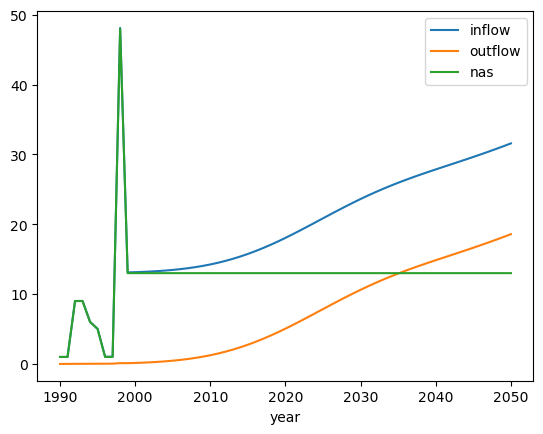

In [14]:
# Plot the evolution of the inflows, outflows and net addition to stock over time
data[["inflow", "outflow", "nas"]].plot()

<Axes: xlabel='year'>

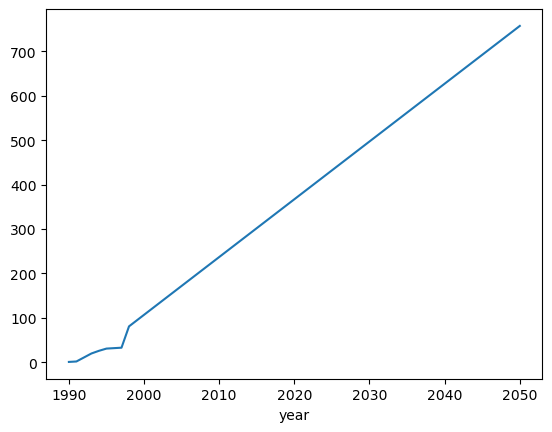

In [15]:
# Plot the evolution of the stock over time
data["stock"].plot()

<Axes: xlabel='year'>

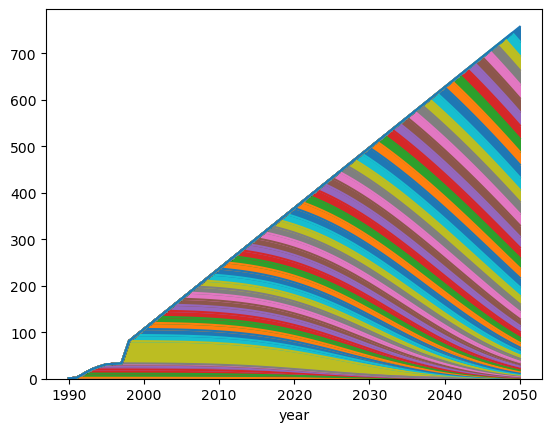

In [16]:
# Visualize the stock by cohort_surv_matrixs
cohort_surv_matrix.plot(kind="area", stacked=True, legend=False)

# Export output data to Excel


In [17]:
# Save the data to an Excel file
# (you may need to create the folder if it doesn't exist)
file_path = BASE_DIR / "data_output" / "week_2_tutorial_myname.xlsx"
data.to_excel(file_path, sheet_name="stock_driven")

In [18]:
# But we also want to save the cohort_surv_matrix data in the same excel file
# without overwriting the file.
# To do that, we open an Excel file in append mode ('a')
# https://pandas.pydata.org/docs/reference/api/pandas.ExcelWriter.html

with pd.ExcelWriter(file_path, mode="a") as writer:
    cohort_surv_matrix.to_excel(writer, sheet_name="cohort_surv_matrix_stock_driven")

# More information and tips


- [Statistical functions in scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html)
- [Pandas excel writer](https://pandas.pydata.org/docs/reference/api/pandas.ExcelWriter.html)
